In [3]:
import tensorflow as tf


In [6]:
from tensorflow.keras import datasets,layers,models


In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 42s 0us/step


In [9]:
X_train.shape

(50000, 32, 32, 3)

In [10]:
y_train.shape

(50000, 1)

In [12]:
X_train.dtype

dtype('uint8')

In [13]:
X_test.shape

(10000, 32, 32, 3)

In [14]:
y_test.shape

(10000, 1)

In [22]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [23]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [16]:
X_train=X_train/255
X_test=X_test/255

In [25]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","Horse","ship","truck"]

In [27]:
classes[y_train[1]]

'truck'

In [29]:

def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

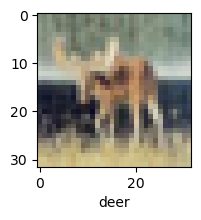

In [32]:
plot_sample(X_train,y_train, 28)

In [38]:
cnn=models.Sequential([
    layers.Input(shape=(32,32,3)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),  #input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu' ),
    layers.MaxPooling2D((2,2)),
    #usual layers
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10, activation='softmax')
    
])
    
    

In [65]:
#keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [39]:
cnn.compile(loss='sparse_categorical_crossentropy',
            optimizer='adam' ,
            metrics=['accuracy'])
            

In [40]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 37ms/step - accuracy: 0.3804 - loss: 1.7038
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.5962 - loss: 1.1562
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.6539 - loss: 0.9950
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.6869 - loss: 0.9005
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.7165 - loss: 0.8201
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.7293 - loss: 0.7695
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.7457 - loss: 0.7213
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.7659 - loss: 0.6677
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.7824 - loss: 0.6168
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.7978 - loss: 0.5814


In [44]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7041 - loss: 0.9139


[0.9282425045967102, 0.695900022983551]

In [41]:
y_test=y_test.reshape(-1,)

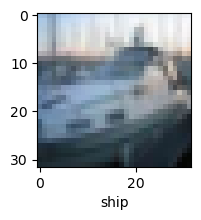

In [57]:
plot_sample(X_test,y_test, 2)

In [43]:
X_new=X_test[:3]

In [47]:
y_pred=cnn.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


In [58]:
classes[np.argmax(y_pred[2])]

'ship'

For whole X_test

In [59]:
y_pred=cnn.predict(X_test)
#y_pred[:5]


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [63]:
y_classes= [np.argmax(element) for element in y_pred]
y_classes[:10]

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1]

In [62]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

In [67]:
classes[y_classes[2]]

'ship'

In [68]:
from sklearn.metrics import classification_report

print(f"Classification report: \n " , classification_report(y_test , y_classes))

Classification report: 
                precision    recall  f1-score   support

           0       0.71      0.75      0.73      1000
           1       0.84      0.76      0.80      1000
           2       0.61      0.61      0.61      1000
           3       0.53      0.45      0.49      1000
           4       0.66      0.64      0.65      1000
           5       0.57      0.65      0.61      1000
           6       0.87      0.70      0.78      1000
           7       0.70      0.77      0.73      1000
           8       0.76      0.83      0.80      1000
           9       0.74      0.80      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

